# matrix fold of gate Y adapted to ibmq4

In [1]:
# Checking the version of PYTHON; we only support > 3.5
import sys
sys.path.append('../../../Transferências/qiskit-sdk-py-master')

if sys.version_info < (3,5):
    raise Exception('Please use Python version 3.5 or greater.')

import qiskit
import numpy

# Import the QISKit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, QuantumProgram, Result
from qiskit import available_backends, execute, register, get_backend
import getpass, time
import Qconfig
from qiskit import compile


# import basic plot tools
from qiskit.tools.visualization import plot_histogram, circuit_drawer, plot_state

#information of API
from IBMQuantumExperience import IBMQuantumExperience

# Import tomography tools
import qiskit.tools.qcvv.tomography as tomo

# Aditional packages
from qiskit.tools.qi.qi import *

In [2]:
api = IBMQuantumExperience(Qconfig.APItoken)
myCredits = api.get_my_credits()

print(myCredits)

# set the APIToken and API url
try:
    register(Qconfig.APItoken,Qconfig.config['url'])

    print('\nYou have access to great power!')
    print(available_backends({'local': False, 'simulator': False}))
    print('Available simulators:')
    print(available_backends({'simulator':True}))
except: 
    print('Something went wrong.\nDid you enter a correct token?')

{'maxUserType': 15, 'promotional': 0, 'remaining': 15}

You have access to great power!
Something went wrong.
Did you enter a correct token?


In [3]:
# Creating Programs
# create QuantumProgram object instance.
qp = QuantumProgram()

# Creating Registers
# create Quantum Register called "qr" with 3 qubits 
qr = qp.create_quantum_register('qr', 4)
# create Classical Register  called "cr" with 3 bits
cr = qp.create_classical_register('cr', 4)

# Creating Circuits
# create Quantum Circuit called "qc" involving your Quantum Register "qr"
# and your Classical Register "cr"
qc = qp.create_circuit('Circuit', [qr], [cr])

In [4]:
# Get the components.

# get the circuit by Name
circuit = qp.get_circuit('Circuit')

# get the Quantum Register by Name
quantum_r = qp.get_quantum_register('qr')

# get the Classical Register by Name
classical_r = qp.get_classical_register('cr')

In [5]:
#preparing qubits
qc.x(qr[1])
qc.x(qr[2])
qc.x(qr[3])


# the circuit we want:
qc.h(qr[0])
qc.cx(qr[0],qr[3])
qc.cx(qr[3],qr[2])
qc.t(qr[3])
qc.tdg(qr[2])
qc.cx(qr[0],qr[3])
qc.cx(qr[3],qr[2])
qc.tdg(qr[0])
qc.t(qr[2])
qc.cx(qr[0],qr[2])
qc.h(qr[0])
qc.tdg(qr[1])
qc.tdg(qr[0])
qc.cx(qr[1],qr[0])
qc.t(qr[0])
qc.cx(qr[1],qr[0])
qc.h(qr[0])
qc.cx(qr[0],qr[2])
qc.tdg(qr[2])
qc.t(qr[0])
qc.cx(qr[3],qr[2])
qc.cx(qr[0],qr[3])
qc.t(qr[2])
qc.tdg(qr[3])
qc.cx(qr[3],qr[2])
qc.cx(qr[0],qr[3])
qc.h(qr[0])
qc.barrier(qr[0])
qc.h(qr[0])
qc.cx(qr[0],qr[3])
qc.cx(qr[3],qr[1])
qc.t(qr[3])
qc.t(qr[1])
qc.cx(qr[0],qr[3])
qc.cx(qr[3],qr[1])
qc.tdg(qr[0])
qc.tdg(qr[1])
qc.cx(qr[0],qr[1])
qc.h(qr[0])
qc.cx(qr[2],qr[0])
qc.tdg(qr[0])
qc.cx(qr[2],qr[0])
qc.t(qr[0])
qc.t(qr[2])
qc.h(qr[0])
qc.cx(qr[0],qr[1])
qc.t(qr[1])
qc.t(qr[0])
qc.cx(qr[3],qr[1])
qc.cx(qr[0],qr[3])
qc.tdg(qr[1])
qc.tdg(qr[3])
qc.cx(qr[3],qr[1])
qc.cx(qr[0],qr[3])
qc.h(qr[0])
qc.h(qr[1])
qc.t(qr[1])
qc.t(qr[3])
qc.t(qr[2])
qc.cx(qr[3],qr[2])
qc.cx(qr[1],qr[3])
qc.cx(qr[2],qr[1])
qc.tdg(qr[3])
qc.t(qr[1])
qc.cx(qr[2],qr[3])
qc.tdg(qr[3])
qc.tdg(qr[2])
qc.cx(qr[1],qr[3])
qc.cx(qr[2],qr[1])
qc.cx(qr[3],qr[2])
qc.h(qr[1])
qc.barrier(qr[0])
qc.h(qr[0])
qc.cx(qr[0],qr[3])
qc.cx(qr[3],qr[2])
qc.tdg(qr[3])
qc.t(qr[2])
qc.cx(qr[0],qr[3])
qc.cx(qr[3],qr[2])
qc.tdg(qr[0])
qc.t(qr[2])
qc.cx(qr[0],qr[2])
qc.h(qr[0])
qc.tdg(qr[1])
qc.tdg(qr[0])
qc.cx(qr[1],qr[0])
qc.t(qr[0])
qc.cx(qr[1],qr[0])
qc.h(qr[0])
qc.cx(qr[0],qr[2])
qc.tdg(qr[2])
qc.t(qr[0])
qc.cx(qr[3],qr[2])
qc.cx(qr[0],qr[3])
qc.tdg(qr[2])
qc.t(qr[3])
qc.cx(qr[3],qr[2])
qc.cx(qr[0],qr[3])
qc.h(qr[0])
qc.barrier(qr[0])
qc.h(qr[0])
qc.cx(qr[0],qr[3])
qc.cx(qr[3],qr[1])
qc.tdg(qr[3])
qc.tdg(qr[1])
qc.cx(qr[0],qr[3])
qc.cx(qr[3],qr[1])
qc.tdg(qr[0])
qc.tdg(qr[1])
qc.cx(qr[0],qr[1])
qc.h(qr[0])
qc.cx(qr[2],qr[0])
qc.tdg(qr[0])
qc.cx(qr[2],qr[0])
qc.t(qr[0])
qc.t(qr[2])
qc.h(qr[0])
qc.cx(qr[0],qr[1])
qc.t(qr[1])
qc.t(qr[0])
qc.cx(qr[3],qr[1])
qc.cx(qr[0],qr[3])
qc.t(qr[1])
qc.t(qr[3])
qc.cx(qr[3],qr[1])
qc.cx(qr[0],qr[3])
qc.h(qr[0])
qc.h(qr[1])
qc.t(qr[1])
qc.tdg(qr[3])
qc.t(qr[2])
qc.cx(qr[3],qr[2])
qc.cx(qr[1],qr[3])
qc.cx(qr[2],qr[1])
qc.t(qr[3])
qc.tdg(qr[1])
qc.cx(qr[2],qr[3])
qc.tdg(qr[3])
qc.t(qr[2])
qc.cx(qr[1],qr[3])
qc.cx(qr[2],qr[1])
qc.cx(qr[3],qr[2])
qc.h(qr[1])

# don't forget update the number of qubits and bits registered


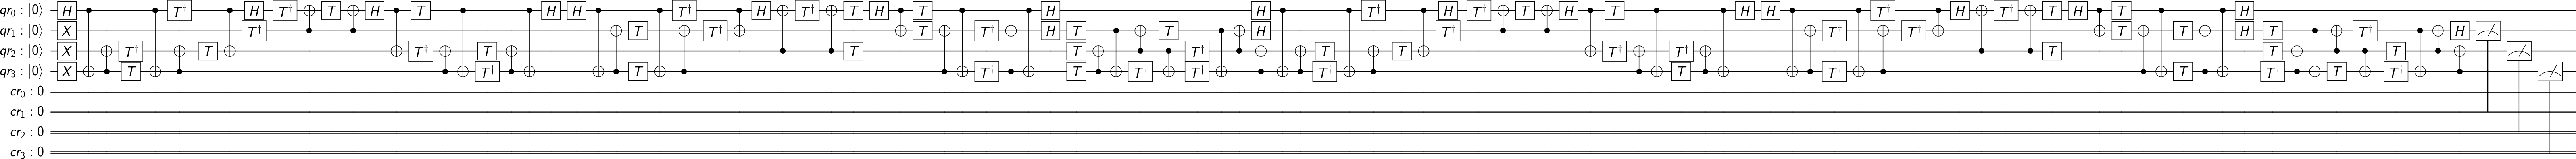

In [6]:
qc.measure(qr[1],cr[1])
qc.measure(qr[2],cr[2])
qc.measure(qr[3],cr[3])

circuit_drawer(qc)

In [7]:
qp.get_circuit_names()

['Circuit']

Status @ 0 seconds
{'status': <JobStatus.RUNNING: 'job is actively running'>, 'status_msg': None}
{'status': <JobStatus.DONE: 'job has successfully run'>, 'status_msg': None}
{'1100': 1024}


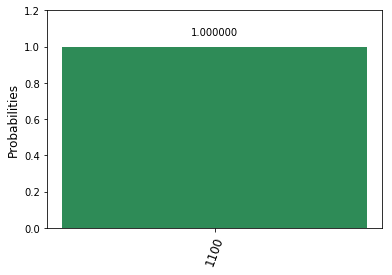

In [8]:
#other way complire and run:
job = execute(qc, backend='local_qasm_simulator', shots=1024, max_credits=3)

lapse = 0
interval = 5
while not job.done:
    print('Status @ {} seconds'.format(interval * lapse))
    print(job.status)
    time.sleep(interval)
    lapse += 1
print(job.status)

print(job.result().get_counts(qc))
plot_histogram(job.result().get_counts(qc))

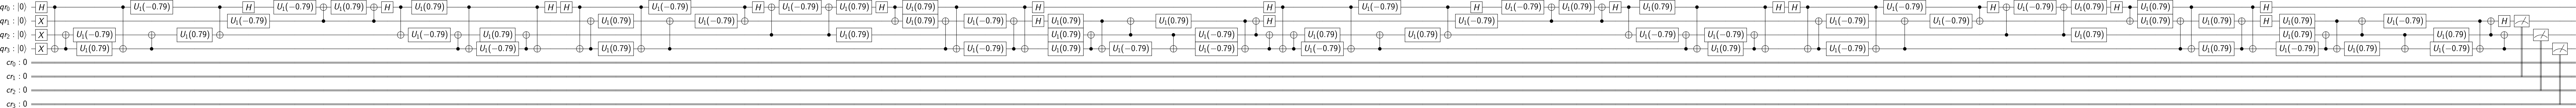

In [9]:
#the circuit running is not the one we write
qobj = compile(qc, backend='local_qasm_simulator')

qasm_str = qp.get_compiled_qasm(qobj, 'Circuit')

qasm_circ = qiskit.load_qasm_string(qasm_str);
circuit_drawer(qasm_circ)

In [10]:
print(qasm_str)

OPENQASM 2.0;
include "qelib1.inc";
qreg qr[4];
creg cr[4];
x qr[1];
x qr[2];
x qr[3];
h qr[0];
cx qr[0],qr[3];
cx qr[3],qr[2];
u1(0.785398163397448) qr[3];
u1(-0.785398163397448) qr[2];
cx qr[0],qr[3];
cx qr[3],qr[2];
u1(-0.785398163397448) qr[0];
u1(0.785398163397448) qr[2];
cx qr[0],qr[2];
h qr[0];
u1(-0.785398163397448) qr[1];
u1(-0.785398163397448) qr[0];
cx qr[1],qr[0];
u1(0.785398163397448) qr[0];
cx qr[1],qr[0];
h qr[0];
cx qr[0],qr[2];
u1(-0.785398163397448) qr[2];
u1(0.785398163397448) qr[0];
cx qr[3],qr[2];
cx qr[0],qr[3];
u1(0.785398163397448) qr[2];
u1(-0.785398163397448) qr[3];
cx qr[3],qr[2];
cx qr[0],qr[3];
h qr[0];
barrier qr[0];
h qr[0];
cx qr[0],qr[3];
cx qr[3],qr[1];
u1(0.785398163397448) qr[3];
u1(0.785398163397448) qr[1];
cx qr[0],qr[3];
cx qr[3],qr[1];
u1(-0.785398163397448) qr[0];
u1(-0.785398163397448) qr[1];
cx qr[0],qr[1];
h qr[0];
cx qr[2],qr[0];
u1(-0.785398163397448) qr[0];
cx qr[2],qr[0];
u1(0.785398163397448) qr[0];
u1(0.785398163397448) qr[2];
h qr[0];


# Running on a real device

In [11]:
def lowest_pending_jobs():
    """Returns the backend with lowest pending jobs."""
    list_of_backends = available_backends(
        {'local': False, 'simulator': False})
    device_status = [get_backend(backend).status
                     for backend in list_of_backends]

    best = min([x for x in device_status if x['operational'] is True],
               key=lambda x: x['pending_jobs'])
    return best['name']

backend = lowest_pending_jobs()
print("The best backend is " + backend)

The best backend is ibmqx5


In [12]:
backend= 'ibmqx4'
api.backend_status(backend)

{'available': True, 'backend': 'ibmqx4', 'pending_jobs': 547}

In [13]:
api.backend_calibration(backend)

{'backend': 'ibmqx4',
 'lastUpdateDate': '2018-08-17T01:56:16.000Z',
 'multiQubitGates': [{'gateError': {'date': '2018-08-17T01:56:16Z',
    'value': 0.0337151243343308},
   'name': 'CX1_0',
   'qubits': [1, 0],
   'type': 'CX'},
  {'gateError': {'date': '2018-08-17T01:56:16Z',
    'value': 0.029287814063947537},
   'name': 'CX2_0',
   'qubits': [2, 0],
   'type': 'CX'},
  {'gateError': {'date': '2018-08-17T01:56:16Z', 'value': 0.04377854220342034},
   'name': 'CX2_1',
   'qubits': [2, 1],
   'type': 'CX'},
  {'gateError': {'date': '2018-08-17T01:56:16Z', 'value': 0.05522960675434732},
   'name': 'CX3_2',
   'qubits': [3, 2],
   'type': 'CX'},
  {'gateError': {'date': '2018-08-17T01:56:16Z', 'value': 0.04267973866650249},
   'name': 'CX3_4',
   'qubits': [3, 4],
   'type': 'CX'},
  {'gateError': {'date': '2018-08-17T01:56:16Z', 'value': 0.0704128028101372},
   'name': 'CX4_2',
   'qubits': [4, 2],
   'type': 'CX'}],
 'qubits': [{'gateError': {'date': '2018-08-17T01:56:16Z',
    'value'

In [14]:
api.backend_parameters(backend)

{'backend': 'ibmqx4',
 'fridgeParameters': {'Temperature': {'date': '-', 'unit': '-', 'value': []},
  'cooldownDate': '2017-09-07'},
 'lastUpdateDate': '2018-08-17T01:56:16.000Z',
 'qubits': [{'T1': {'date': '2018-08-17T01:56:16Z',
    'unit': 'µs',
    'value': 25.7},
   'T2': {'date': '2018-08-17T01:56:16Z', 'unit': 'µs', 'value': 33.6},
   'buffer': {'date': '2018-08-17T01:56:16Z', 'unit': 'ns', 'value': 10},
   'frequency': {'date': '2018-08-17T01:56:16Z',
    'unit': 'GHz',
    'value': 5.24985},
   'gateTime': {'date': '2018-08-17T01:56:16Z', 'unit': 'ns', 'value': 60},
   'name': 'Q0'},
  {'T1': {'date': '2018-08-17T01:56:16Z', 'unit': 'µs', 'value': 47},
   'T2': {'date': '2018-08-17T01:56:16Z', 'unit': 'µs', 'value': 23.8},
   'buffer': {'date': '2018-08-17T01:56:16Z', 'unit': 'ns', 'value': 10},
   'frequency': {'date': '2018-08-17T01:56:16Z',
    'unit': 'GHz',
    'value': 5.2958},
   'gateTime': {'date': '2018-08-17T01:56:16Z', 'unit': 'ns', 'value': 60},
   'name': 'Q1'},

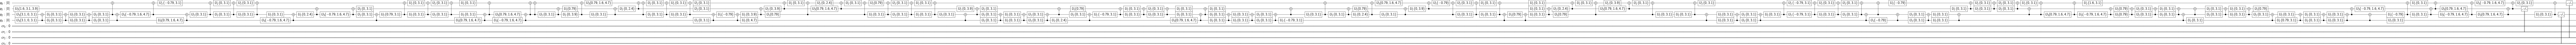

In [15]:
qobj = compile(qc, backend=backend)

qs_str = qp.get_compiled_qasm(qobj, 'Circuit')

qs_circ = qiskit.load_qasm_string(qs_str);
circuit_drawer(qs_circ)

In [16]:
print(qs_str)

OPENQASM 2.0;
include "qelib1.inc";
qreg q[4];
creg cr[4];
u3(3.14159265358979,0,3.14159265358979) q[3];
u3(3.14159265358979,0,3.14159265358979) q[2];
u3(1.57079632679490,3.14159265358979,3.92699081698724) q[1];
cx q[3],q[2];
u2(0,3.14159265358979) q[2];
u2(0,3.14159265358979) q[3];
cx q[3],q[2];
u2(0,3.14159265358979) q[2];
u2(0,3.14159265358979) q[3];
cx q[3],q[2];
u2(0,3.14159265358979) q[3];
u2(0,3.14159265358979) q[2];
cx q[2],q[0];
cx q[3],q[2];
u3(-0.785398163397448,1.57079632679490,4.71238898038469) q[2];
cx q[2],q[0];
u2(-0.785398163397448,3.14159265358979) q[0];
u3(0.785398163397448,1.57079632679490,4.71238898038469) q[3];
cx q[3],q[2];
u2(0,3.14159265358979) q[2];
cx q[2],q[0];
u2(0,3.14159265358979) q[0];
u2(0,3.14159265358979) q[2];
cx q[2],q[0];
u2(0,3.14159265358979) q[0];
u2(0,3.14159265358979) q[2];
cx q[2],q[0];
u2(0,3.14159265358979) q[2];
u3(-0.785398163397448,1.57079632679490,4.71238898038469) q[3];
cx q[3],q[2];
u2(0,2.35619449019234) q[2];
cx q[2],q[1];
u3(-0.785

In [17]:
shots=1024
max_credits=3
job_exp = execute(qc, backend=backend, shots=shots, max_credits=max_credits)

lapse = 0
interval = 10
while not job_exp.done:
    print('Status @ {} seconds'.format(interval * lapse))
    print(job_exp.status)
    time.sleep(interval)
    lapse += 1
print(job_exp.status)

Status @ 0 seconds
{'job_id': None, 'status': <JobStatus.INITIALIZING: 'job is being initialized'>, 'status_msg': 'Job is initializing. Please, wait a moment.'}
Status @ 10 seconds
{'job_id': None, 'status': <JobStatus.INITIALIZING: 'job is being initialized'>, 'status_msg': 'Job is initializing. Please, wait a moment.'}
Status @ 20 seconds
{'job_id': None, 'status': <JobStatus.INITIALIZING: 'job is being initialized'>, 'status_msg': 'Job is initializing. Please, wait a moment.'}
Status @ 30 seconds
{'job_id': None, 'status': <JobStatus.INITIALIZING: 'job is being initialized'>, 'status_msg': 'Job is initializing. Please, wait a moment.'}
Status @ 40 seconds
{'job_id': None, 'status': <JobStatus.INITIALIZING: 'job is being initialized'>, 'status_msg': 'Job is initializing. Please, wait a moment.'}
Status @ 50 seconds
{'job_id': None, 'status': <JobStatus.INITIALIZING: 'job is being initialized'>, 'status_msg': 'Job is initializing. Please, wait a moment.'}
Status @ 60 seconds
{'job_id'

Got a 502 code response to https://quantumexperience.ng.bluemix.net/api/Jobs?access_token=3BrJxgsS0SrKnHunySqXg2jIeCTVNKMFRcZ3OTLTm8VPuNMeUMRinD8IsF6eGxCN: 502 Bad Gateway: Registered endpoint failed to handle the request.



Status @ 130 seconds
{'job_id': None, 'status': <JobStatus.INITIALIZING: 'job is being initialized'>, 'status_msg': 'Job is initializing. Please, wait a moment.'}
Status @ 140 seconds
{'job_id': '5b7689eeb460170042e6b69e', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 547}
Status @ 150 seconds
{'job_id': '5b7689eeb460170042e6b69e', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 547}
Status @ 160 seconds
{'job_id': '5b7689eeb460170042e6b69e', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 547}
Status @ 170 seconds
{'job_id': '5b7689eeb460170042e6b69e', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 546}
Status @ 180 seconds
{'job_id': '5b7689eeb460170042e6b69e', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 546}
Status @ 190 seconds
{'job_id': 

Status @ 640 seconds
{'job_id': '5b7689eeb460170042e6b69e', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 531}
Status @ 650 seconds
{'job_id': '5b7689eeb460170042e6b69e', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 531}
Status @ 660 seconds
{'job_id': '5b7689eeb460170042e6b69e', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 531}
Status @ 670 seconds
{'job_id': '5b7689eeb460170042e6b69e', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 530}
Status @ 680 seconds
{'job_id': '5b7689eeb460170042e6b69e', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 530}
Status @ 690 seconds
{'job_id': '5b7689eeb460170042e6b69e', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 530}
Status @ 700 seconds
{'job_id': '5

Status @ 1150 seconds
{'job_id': '5b7689eeb460170042e6b69e', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 518}
Status @ 1160 seconds
{'job_id': '5b7689eeb460170042e6b69e', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 518}
Status @ 1170 seconds
{'job_id': '5b7689eeb460170042e6b69e', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 518}
Status @ 1180 seconds
{'job_id': '5b7689eeb460170042e6b69e', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 517}
Status @ 1190 seconds
{'job_id': '5b7689eeb460170042e6b69e', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 517}
Status @ 1200 seconds
{'job_id': '5b7689eeb460170042e6b69e', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 517}
Status @ 1210 seconds
{'job_

Status @ 1660 seconds
{'job_id': '5b7689eeb460170042e6b69e', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 501}
Status @ 1670 seconds
{'job_id': '5b7689eeb460170042e6b69e', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 501}
Status @ 1680 seconds
{'job_id': '5b7689eeb460170042e6b69e', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 501}
Status @ 1690 seconds
{'job_id': '5b7689eeb460170042e6b69e', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 501}
Status @ 1700 seconds
{'job_id': '5b7689eeb460170042e6b69e', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 501}
Status @ 1710 seconds
{'job_id': '5b7689eeb460170042e6b69e', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 501}
Status @ 1720 seconds
{'job_

Status @ 2170 seconds
{'job_id': '5b7689eeb460170042e6b69e', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 494}
Status @ 2180 seconds
{'job_id': '5b7689eeb460170042e6b69e', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 495}
Status @ 2190 seconds
{'job_id': '5b7689eeb460170042e6b69e', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 495}
Status @ 2200 seconds
{'job_id': '5b7689eeb460170042e6b69e', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 494}
Status @ 2210 seconds
{'job_id': '5b7689eeb460170042e6b69e', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 494}
Status @ 2220 seconds
{'job_id': '5b7689eeb460170042e6b69e', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 494}
Status @ 2230 seconds
{'job_

Status @ 2680 seconds
{'job_id': '5b7689eeb460170042e6b69e', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 531}
Status @ 2690 seconds
{'job_id': '5b7689eeb460170042e6b69e', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 531}
Status @ 2700 seconds
{'job_id': '5b7689eeb460170042e6b69e', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 531}
Status @ 2710 seconds
{'job_id': '5b7689eeb460170042e6b69e', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 531}
Status @ 2720 seconds
{'job_id': '5b7689eeb460170042e6b69e', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 531}
Status @ 2730 seconds
{'job_id': '5b7689eeb460170042e6b69e', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 531}
Status @ 2740 seconds
{'job_

Status @ 3190 seconds
{'job_id': '5b7689eeb460170042e6b69e', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 524}
Status @ 3200 seconds
{'job_id': '5b7689eeb460170042e6b69e', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 523}
Status @ 3210 seconds
{'job_id': '5b7689eeb460170042e6b69e', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 524}
Status @ 3220 seconds
{'job_id': '5b7689eeb460170042e6b69e', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 524}
Status @ 3230 seconds
{'job_id': '5b7689eeb460170042e6b69e', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 524}
Status @ 3240 seconds
{'job_id': '5b7689eeb460170042e6b69e', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 524}
Status @ 3250 seconds
{'job_

Status @ 3700 seconds
{'job_id': '5b7689eeb460170042e6b69e', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 509}
Status @ 3710 seconds
{'job_id': '5b7689eeb460170042e6b69e', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 509}
Status @ 3720 seconds
{'job_id': '5b7689eeb460170042e6b69e', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 509}
Status @ 3730 seconds
{'job_id': '5b7689eeb460170042e6b69e', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 509}
Status @ 3740 seconds
{'job_id': '5b7689eeb460170042e6b69e', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 507}
Status @ 3750 seconds
{'job_id': '5b7689eeb460170042e6b69e', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 508}
Status @ 3760 seconds
{'job_

Status @ 4210 seconds
{'job_id': '5b7689eeb460170042e6b69e', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 497}
Status @ 4220 seconds
{'job_id': '5b7689eeb460170042e6b69e', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 496}
Status @ 4230 seconds
{'job_id': '5b7689eeb460170042e6b69e', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 495}
Status @ 4240 seconds
{'job_id': '5b7689eeb460170042e6b69e', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 496}
Status @ 4250 seconds
{'job_id': '5b7689eeb460170042e6b69e', 'status': <JobStatus.RUNNING: 'job is actively running'>, 'status_msg': 'job is actively running'}
Status @ 4260 seconds
{'job_id': '5b7689eeb460170042e6b69e', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 496}
Status @ 4270 seconds
{'job_id

Status @ 4720 seconds
{'job_id': '5b7689eeb460170042e6b69e', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 479}
Status @ 4730 seconds
{'job_id': '5b7689eeb460170042e6b69e', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 479}
Status @ 4740 seconds
{'job_id': '5b7689eeb460170042e6b69e', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 478}
Status @ 4750 seconds
{'job_id': '5b7689eeb460170042e6b69e', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 478}
Status @ 4760 seconds
{'job_id': '5b7689eeb460170042e6b69e', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 478}
Status @ 4770 seconds
{'job_id': '5b7689eeb460170042e6b69e', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 478}
Status @ 4780 seconds
{'job_

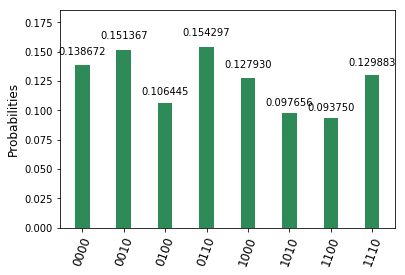

In [18]:
plot_histogram(job_exp.result().get_counts(qc))

In [19]:
job_exp.result().get_data('Circuit')

{'counts': {'0000': 142,
  '0010': 155,
  '0100': 109,
  '0110': 158,
  '1000': 131,
  '1010': 100,
  '1100': 96,
  '1110': 133},
 'date': '2018-08-17T10:32:30.925Z',
 'time': 25.219287872314453}